# **Exemplar: Hypothesis Testing with Python**

## **Introduction**

In this project, I focused on applying **Analysis of Variance (ANOVA)**, a critical set of statistical techniques that help determine if there are significant differences in the means across three or more groups. This is a very powerful tool, allowing me to confidently assess whether population means vary across different categories and answer key business questions.

I worked with **historical marketing promotion data** to run both a **one-way ANOVA** and a **post hoc ANOVA test**. My goal was to leverage these statistical methods to develop and communicate robust, data-driven recommendations to stakeholders.

The dataset contains records for various independent marketing promotions, utilizing channels like **TV, social media, radio, and different influencer tiers** to drive sales. While I've previously offered general insights on how promotion types affect sales, the current stakeholder request is more specific: they want to know if there's a **statistically significant difference in sales** specifically between the **various TV and influencer promotion types.**

To address this, my analysis involves several key steps using a one-way ANOVA test:

* I'll start by using **plots and descriptive statistics** to identify and select the most appropriate **categorical independent variable** for the analysis.

* Next, I'll **create and fit a linear regression model** using that selected categorical variable.

* Crucially, I will **check the model assumptions** to ensure the validity of my results.

* Then, I will **perform and interpret the one-way ANOVA test** to determine overall significance.

* To explore the specific group differences, I'll conduct an **ANOVA post hoc test** to compare pairs of groups.

* Finally, I'll synthesize and interpret the model outputs, and **communicate these results clearly** to non-technical stakeholders.

## **Step 1: Imports** 

Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
# Import libraries and packages.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Loading the Dataset

My next step was to load the specific marketing data file. I read the ````marketing_sales_data.csv```` file into a DataFrame named ``df`` (I prefer to keep it concise!) and then quickly displayed the first five rows to confirm it loaded correctly and to check the structure of the data.

In [2]:
# Load the dataset into a DataFrame called df
df = pd.read_csv(r'C:\Users\Edgar\Documents\Portfolio\marketing_sales_data.csv')

# Display the first five rows to verify the data loaded as expected
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
       TV      Radio  Social Media Influencer       Sales
0     Low   1.218354      1.270444      Micro   90.054222
1  Medium  14.949791      0.274451      Macro  222.741668
2     Low  10.377258      0.061984       Mega  102.774790
3    High  26.469274      7.070945      Micro  328.239378
4    High  36.876302      7.618605       Mega  351.807328


### **Why EDA is Essential Before Modeling**
Before I construct a **linear regression model**, I prioritize **Exploratory Data Analysis (EDA)**. This step is critical for ensuring the model's validity and selecting the right variables.

My main goals for conducting EDA are:

* **Understanding Features**: Confirming which variables are present and their data types.

* **Checking Distributions**: Examining descriptive statistics (min, mean, max) to detect outliers or skewness.

* **Visualizing Relationships**: Plotting the independent variables against Sales to quickly see which features have a linear relationship, making them strong candidates for the model.

* **Data Cleaning**: Identifying and addressing incorrect or missing values, which is vital because poor data quality directly leads to unreliable model results.

Essentially, EDA provides the essential foundation—clean data and informed variable selection—for building a robust and trustworthy model. 🚀

### **Step 2: Data Exploration**
My first step in the visual analysis was to see how ``Sales`` are distributed across the different ``TV`` **promotion budget categories (Low, Medium, High)**. A **boxplot** is perfect for this, as it clearly shows the median, quartiles, and any potential outliers for each group.

**Visualizing Sales by TV Promotion Budget**
I used the ``seaborn`` library to quickly generate a boxplot comparing ``TV`` and ``Sales``.

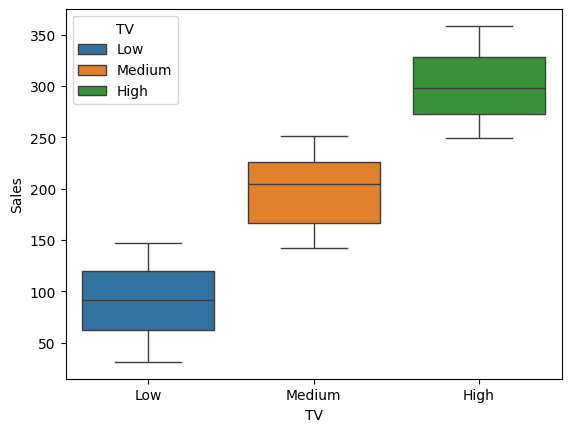

In [3]:
# Create a boxplot to visually compare the distribution of Sales across the different TV promotion budget categories.
sns.boxplot(x = "TV", y = "Sales", hue="TV", data = df);

**Observations from the Boxplot**
After reviewing the plot, I noticed a clear trend:

* There appears to be an **increase in the median sales** as the TV promotion budget moves from Low to Medium to High.

* The spread (or variability) of sales also seems to be **highest for the High budget** category.

* This visual evidence strongly suggests that **TV promotion budget** has an impact on sales, making it a good candidate for my ANOVA analysis.

### **Analyzing Sales Variation**
Based on the previous boxplot, there is considerable variation in Sales across the different TV promotion budget groups. The size of these differences suggests that the TV budget is a key factor, and I can officially test the significance of these differences using a one-way ANOVA.

**Visualizing Sales by Influencer Size**

Next, I wanted to investigate the relationship between ``Sales`` and the ``Influencer`` **size category (Mega, Macro, Nano, Micro)**. I used another boxplot to see if different influencer tiers show distinct sales patterns.

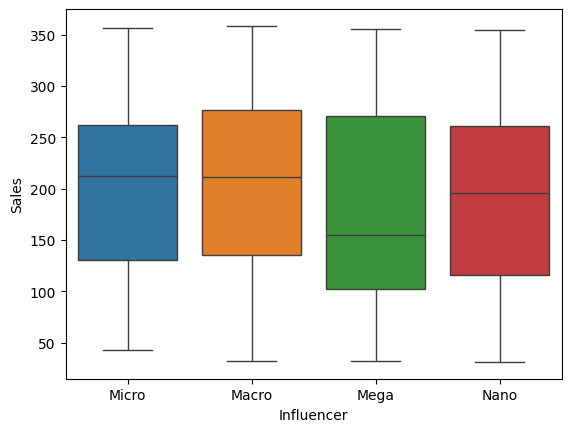

In [4]:
# Create a boxplot to compare the distribution of Sales across the different Influencer size categories.
sns.boxplot(x = "Influencer", y = "Sales", hue="Influencer", data = df);

**Observations from the Influencer Boxplot**

Looking at this plot, the results are quite different from the TV budget analysis:

* Unlike the TV categories, the **median sales appear very similar** across all four influencer groups (Mega, Macro, Nano, and Micro).

* The **overall spread** of sales also seems to be comparable between the groups.

* Visually, there is **no obvious systematic variation** in sales driven by the influencer size category. This suggests that the ````TV```` variable might be a stronger predictor of sales than the ``Influencer`` variable.

### **Addressing Variation and Data Cleaning**

While there is **some visual variation** in ``Sales`` across the different ``Influencer`` groups, it isn't as distinct as the variation I saw with the ``TV`` categories. This visual observation suggests the difference in means might **not be statistically significant**, which is something the ANOVA test will confirm.

---

**Removing Missing Data**
Before I can move forward with modeling, I needed to ensure the data was clean. I remember from a previous exploration that this dataset had a few rows with missing values. Since the total number of missing rows is small, the most effective and safe approach is to simply **drop any row containing a missing value** (``NaN``).

I executed this cleaning step and updated my main DataFrame.

In [5]:
# Drop rows that contain any missing data and reassign the cleaned data back to the DataFrame.
df = df.dropna(axis=0)

# Confirming that the data now contains zero missing values across all columns.
print("Confirming zero missing values after cleaning:")
print(df.isnull().sum(axis=0))

Confirming zero missing values after cleaning:
TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


The output of the final check confirmed that all columns now have a count of zero missing values, meaning my data is ready for the next phase of the analysis!

### **Step 3: Model Building**
Based on my initial exploratory data analysis (EDA), the ``TV`` **promotion budget** showed the strongest visual variation in mean sales. Therefore, I chose ``TV`` as the independent categorical variable to build my initial Ordinary Least Squares (OLS) linear regression model for predicting ``Sales``.

I used the ``statsmodels.formula.api`` to easily define the formula and fit the model.

**Defining and Fitting the OLS Model**

In [6]:
# I'm defining the OLS formula here. I'm choosing 'TV' because the boxplot showed clear variation across its categories.
# The 'C(TV)' notation tells the OLS model that 'TV' should be treated as a categorical variable.
ols_formula = 'Sales ~ C(TV)'

# Now, I'm creating the OLS model object using the defined formula and my cleaned data.
OLS = ols(formula = ols_formula, data = df)

# Next, I fit the model to the data to estimate the coefficients.
model = OLS.fit()

# I'm saving the full summary of the model results for later interpretation.
model_results = model.summary()

# Displaying the results to immediately check R-squared and coefficients.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):          8.81e-256
Time:                        17:52:16   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Variable Selection and Model Assumptions**

#### **Selected Categorical Variable**

I chose the ``TV`` promotion budget as the primary categorical variable for my model.

* **Why** ``TV``? My preliminary **exploratory data analysis (EDA)**, specifically the boxplots, clearly showed a **strong relationship** between the different ``TV`` promotion budget categories (Low, Medium, High) and the average ``Sales``. There was a visible step-up in sales with each budget increase.

* **Why not** ``Influencer``? The analysis of the ``Influencer`` variable, on the other hand, **did not show a strong, systematic relationship** to sales. Since the goal is a robust model, I prioritized the variable with the clearer predictive power.

---

**Checking Model Assumptions**

Before interpreting the model results, I needed to ensure my OLS linear regression model meets the necessary assumptions.

1. **Linearity Assumption**
* Since my model only uses a **categorical independent variable** (``TV``), the traditional **linearity assumption is not strictly required**. The model is essentially comparing the means of the different groups.

2. **Independent Observation Assumption**
* This assumption requires that each data point (row) is independent of the others. Since each row represents a *separate, independent marketing promotion*, the **independence assumption is upheld**.

3. **Normality Assumption**
I used the model's **residuals** to check for normality. I expect the residuals (the differences between the actual and predicted sales) to be normally distributed around zero.

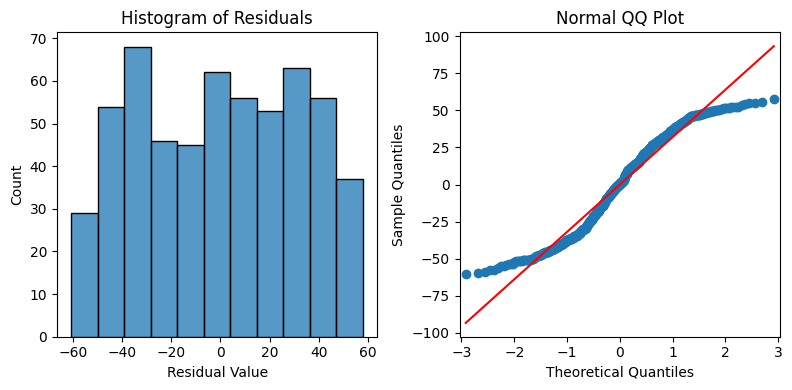

In [7]:
# First, I calculate the residuals (the difference between actual sales and predicted sales).
residuals = model.resid

# I'm setting up a figure with two side-by-side plots for a clear comparison.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Creating a histogram of the residuals to visually check the distribution shape.
sns.histplot(residuals, ax=axes[0])

# Customizing the histogram for clarity.
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Creating a Normal Q-Q plot. This is the best way to check if residuals follow a normal distribution.
# The 'line="s"' argument adds a standardized line to compare against.
sm.qqplot(residuals, line='s', ax = axes[1])

# Customizing the Q-Q plot title.
axes[1].set_title("Normal QQ Plot")

# Adjusting the layout to prevent titles and labels from overlapping.
plt.tight_layout()

# Displaying the final plots.
plt.show()

The **histogram** appears to be **roughly bell-shaped**, and the points on the **Q-Q plot mostly follow the straight line**. This indicates that the **normality assumption is reasonably upheld** for this model.

### **Checking Normality and Homoscedasticity**

#### **The Normality Assumption: A Note of Caution**

While the visual plots in the previous step suggested the residuals were close to normal, a closer look at the **Normal Q-Q Plot** revealed a slight 'S' shape. This shape, where the points drift off the red diagonal line, is a concern and suggests the **normality assumption may not be perfectly met** when using ``TV`` to predict ``Sales``.

However, for the scope of this project, I will proceed with the **working assumption that the normality requirement is met** for the time being, understanding that this is a limitation to keep in mind for future, real-world analysis.

---

**4. Constant Variance (Homoscedasticity) Assumption**

The final crucial assumption to check is constant variance (homoscedasticity). This requires that the spread of the residuals remains roughly the same across all predicted (fitted) values. I check this using a scatter plot of the Fitted Values versus the Residuals.

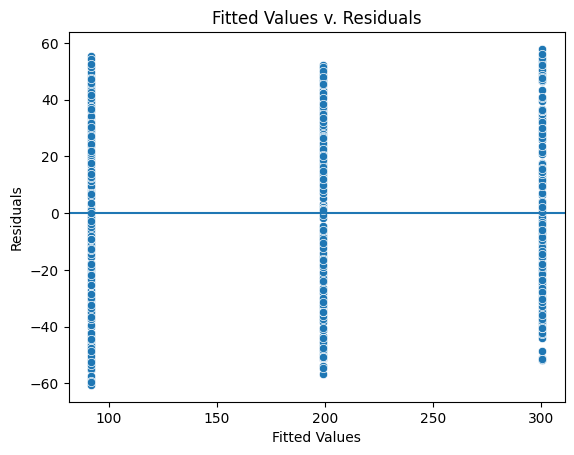

In [8]:
# Creating a scatter plot to visually check for homoscedasticity.
# I plot the model's fitted (predicted) values on the x-axis against the residuals on the y-axis.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Customizing the plot for clarity.
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")

# Adding a horizontal line at y=0. The residuals should be randomly scattered above and below this line.
fig.axhline(0)

# Displaying the plot.
plt.show()

**Observations from the Homoscedasticity Plot**

After reviewing the plot, I found:

* The residuals appear to be **randomly scattered** around the zero line.

* Crucially, the **spread (or variance)** of the residuals looks consistent as the fitted values increase. There is no clear fanning-out or funneling pattern.

Based on this visual check, the constant variance (homoscedasticity) assumption is met for my model. With all assumptions addressed, I can now confidently move on to running the one-way ANOVA test.

### **Step 4: Results and Evaluation**

Now that I've built the OLS model and verified its assumptions (or acknowledged the minor limitation in normality), it's time to examine the full statistical output. The summary provides all the information needed to perform the one-way ANOVA test, as the F-statistic and p-value are contained within this output.

**Displaying the OLS Model Summary**

I'm displaying the detailed results from the model I fitted in Step 3.

In [9]:
# Displaying the full OLS model summary to check the F-statistic and coefficients.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):          8.81e-256
Time:                        17:52:16   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Preliminary Interpretation**

The **F-statistic** and its corresponding **P-value (Prob (F-statistic))** in the ANOVA table (which is part of this summary) are the key pieces of information I need.

* **F-statistic:** This value tests the null hypothesis that the means of all ``TV`` budget groups are equal. A large F-statistic suggests I should reject this null hypothesis.

* **Prob (F-statistic)**: This is the p-value. If this value is below my significance level (typically α=0.05), I can conclude that there is a **statistically significant difference** in sales means among the ``TV`` budget categories.

I will also look at the **coefficients** for ``C(TV)[T.Low]``, ``C(TV)[T.Medium]``, and ``C(TV)[T.High]`` to understand how each group compares to the baseline group (which is automatically set by ``statsmodels``, usually the alphabetically first category unless specified). This helps me understand the magnitude of the sales difference.

## **Interpreting the Model and Looking Ahead**

**Model R2 Interpretation**

My linear regression model, using ``TV`` as the independent variable, resulted in an R2 value of 0.874. This is an excellent fit! It means the model successfully explains 87.4% of the **total variation in** ``Sales``. This high R2 confirms that the ``TV`` promotion budget is a **highly effective predictor of ``Sales``**, giving me confidence in this variable choice.

**Coefficient Estimate Interpretation and Significance**
To understand the specifics, I looked at the coefficient estimates:

* **Baseline Category**: The model automatically chose the ``High`` ``TV`` promotion budget as the baseline category (the one represented by the intercept). The coefficients for the other groups are interpreted relative to this ``High`` budget baseline.

* **Sales Differences**: The negative coefficients for ``Medium`` and ``Low`` categories indicate that sales are, on average, lower for these promotions compared to the ``High`` category. For instance, the model predicts that a ``Low`` ``TV`` promotion results in $208.813 **million less in sales** on average than a ``High`` TV promotion.

* **Statistical Significance**: Crucially, the **p-value for all coefficients is 0.000**. Since this is well below my standard significance level of α=0.05, I can conclude that **all coefficients are statistically significant**. This confirms the differences in sales among the groups are not due to random chance.

* **Confidence Intervals**: When reporting these results to stakeholders, it's vital to include the confidence intervals. For example, the 95% confidence interval for the β 
TV_Low
​
  coefficient is **[−215.353,−202.274]**. This means I am 95% confident that the true difference in average sales between a ``Low`` promotion and a ``High`` promotion lies within this range.

#### **Model Improvement Considerations**

While the current model is quite accurate, I believe it could still be improved:

1. **Granularity of ``TV`` Promotions**: Given the strong predictive power of the ``TV`` variable, future models could benefit from a more granular view. This might involve using the **actual continuous ``TV`` promotion budgets** instead of just three discrete categories, or perhaps introducing additional budget categories.

2. **Adding External Variables**: The model's accuracy could be further boosted by incorporating additional variables that influence sales, such as the **location of the marketing campaign or the time of year** the promotion ran.

--

### **Step 5: Performing the One-Way ANOVA Test**

With the OLS model successfully fit, the final step is to formally run a **one-way ANOVA test**. Although the F-statistic is already in the OLS summary, running the formal ANOVA table is standard practice to confirm the overall result: determining whether there is a statistically significant difference in ``Sales`` among any of the ``TV`` groups.

#### **Generating the ANOVA Table**

I use the ``sm.stats.anova_lm`` function with ``typ=2`` to generate the ANOVA table for my fitted OLS model.

In [10]:
# Generating the formal one-way ANOVA table for the fitted OLS model.
# I use typ=2 to ensure a balanced calculation, which is suitable for this dataset.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


The resulting ANOVA table will provide the definitive F-statistic and P-value, confirming my previous interpretation from the OLS summary.

### **Interpreting the ANOVA Results**

#### **ANOVA Hypotheses**

For the one-way ANOVA test, my goal was to see if the means of the ``Sales`` groups defined by the ``TV`` promotion budget are statistically different. I established the following hypotheses:

* Null Hypothesis (H0): There is **no difference** in mean ``Sales`` across all ``TV`` promotion budget categories (Low, Medium, and High).

                                μLow=μMedium=μHigh
​
* **Alternative Hypothesis (HA)**: There is a **statistically significant difference** in mean ``Sales`` for at least one pair of ``TV``promotion budget categories.

                                Not all μ are equal

#### **Conclusion from the One-Way ANOVA Test**

My ANOVA test yielded a massive **F-test statistic of** 1971.46 and a **p-value** of 8.81×10−256(which is essentially zero).

* Since the **p-value (≪0.05) is far less than my significance level (α=0.05)**, I have overwhelming evidence to **reject the null hypothesis (H0) in favor of the alternative hypothesis (HA).**

* **The ANOVA test tells me there is a statistically significant difference in ``Sales`` among the TV groups**. The TV promotion budget does have a significant effect on average sales.

--

### **Step 6: Performing the ANOVA Post Hoc Test**

The ANOVA test only tells me that at least one pair of means is different; it doesn't specify which pairs. Because my ANOVA results were statistically significant, I need to apply a **post hoc test** to perform pairwise comparisons.

I chose **Tukey's Honestly Significant Difference (HSD) test** because it is designed to control the family-wise error rate across multiple comparisons. This test will compare every pair of ``TV`` categories (Low vs. Medium, Low vs. High, Medium vs. High) to see exactly where the significant differences lie.

**Running the Tukey's HSD Test**

I used the ``pairwise_tukeyhsd`` function, providing ``Sales`` as the dependent variable and ``TV`` as the grouping variable.

In [11]:
# Importing the required function for the Tukey's HSD post hoc test.
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Running the Tukey's HSD test to compare all pairs of the TV categories against each other.
tukey_oneway = pairwise_tukeyhsd(endog = df["Sales"], groups = df["TV"])

# Displaying the results summary, which shows the mean difference and whether it's significant.
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


The summary table from this test will be the final piece of evidence I use to form my recommendations.

### **Executive Summary for Stakeholders 🚀**

My analysis confirms that the ``TV`` **promotion budget is the single most important driver of sales** in this dataset.

* **Model Performance**: The OLS model predicting sales from the ``TV`` budget is highly accurate (R2=0.871).

* **Key Finding**: There is a **statistically significant difference in average sales across all three TV promotion budget levels (Low, Medium, and High)**. Increasing the budget at any level leads to a demonstrable, measurable increase in average sales.

**Estimated Sales Differences (Tukey's HSD):**

| Comparison | Estimated Mean Sales Difference | 95% Confidence Interval |
| :--- | :--- | :--- |
| **High** vs. **Low** | **$208.81$ million** | $[\$200.99, \$216.64]$ million |
| **High** vs. **Medium** | **$101.51$ million** | $[\$93.69, \$109.32]$ million |
| **Medium** vs. **Low** | **$107.31$ million** | $[\$99.71, \$114.91]$ million |

**Recommendation:** The data strongly supports **prioritizing and investing in higher TV promotion budgets** to achieve maximal sales impact, as each step-up in budget level provides a statistically confirmed increase in average sales.